<a href="https://colab.research.google.com/github/ray17062000/project_machine_learning/blob/master/minor_project_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
### if deposits will take place or not for different aspects ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/bank_data_set.csv")

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [75]:
plot_graph = df.drop(columns = ['default','contact','campaign','pdays','previous','poutcome','marital'])
plot_graph


,age,job,education,balance,housing,loan,day,month,duration,deposit
0,59,admin.,secondary,2343,yes,no,5,may,1042,yes
1,56,admin.,secondary,45,no,no,5,may,1467,yes
2,41,technician,secondary,1270,yes,no,5,may,1389,yes
3,55,services,secondary,2476,yes,no,5,may,579,yes
4,54,admin.,tertiary,184,no,no,5,may,673,yes
...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,primary,1,yes,no,20,apr,257,no
11158,39,services,secondary,733,no,no,16,jun,83,no
11159,32,technician,secondary,29,no,no,19,aug,156,no
11160,43,technician,secondary,0,no,yes,8,may,9,no


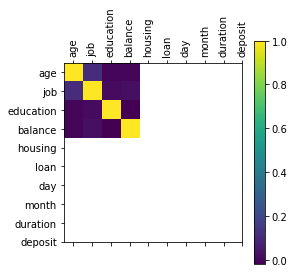

<Figure size 51840x51840 with 0 Axes>

In [79]:
plt.matshow(plot_graph.corr())
plt.xticks(range(len(plot_graph.columns)), plot_graph.columns , rotation = 90)
plt.yticks(range(len(plot_graph.columns)), plot_graph.columns)
plt.colorbar()
plt.figure(figsize = (720,720))
plt.show()


In [50]:
inputs = df.drop(columns = ['default','contact','campaign','pdays','previous','poutcome','deposit','marital'])
inputs

,age,job,education,balance,housing,loan,day,month,duration
0,59,admin.,secondary,2343,yes,no,5,may,1042
1,56,admin.,secondary,45,no,no,5,may,1467
2,41,technician,secondary,1270,yes,no,5,may,1389
3,55,services,secondary,2476,yes,no,5,may,579
4,54,admin.,tertiary,184,no,no,5,may,673
...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,primary,1,yes,no,20,apr,257
11158,39,services,secondary,733,no,no,16,jun,83
11159,32,technician,secondary,29,no,no,19,aug,156
11160,43,technician,secondary,0,no,yes,8,may,9


In [49]:
target = df['deposit']
target

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder
le_job = LabelEncoder()
le_education = LabelEncoder()
le_housing = LabelEncoder()
le_loan = LabelEncoder()
le_month = LabelEncoder()

In [54]:
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['education_n'] = le_education.fit_transform(inputs['education'])
inputs['housing_n'] = le_housing.fit_transform(inputs['housing'])
inputs['loan_n'] = le_loan.fit_transform(inputs['loan'])
inputs['month_n'] = le_month.fit_transform(inputs['month'])

In [67]:
inputs

,age,day,duration,job_n,education_n,housing_n,loan_n,month_n
0,59,5,1042,0,1,1,0,8
1,56,5,1467,0,1,0,0,8
2,41,5,1389,9,1,1,0,8
3,55,5,579,7,1,1,0,8
4,54,5,673,0,2,0,0,8
...,...,...,...,...,...,...,...,...
11157,33,20,257,1,0,1,0,0
11158,39,16,83,7,1,0,0,6
11159,32,19,156,9,1,0,0,1
11160,43,8,9,9,1,0,1,8


In [68]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          11162 non-null  int64
 1   day          11162 non-null  int64
 2   duration     11162 non-null  int64
 3   job_n        11162 non-null  int64
 4   education_n  11162 non-null  int64
 5   housing_n    11162 non-null  int64
 6   loan_n       11162 non-null  int64
 7   month_n      11162 non-null  int64
dtypes: int64(8)
memory usage: 697.8 KB


In [36]:
from sklearn.model_selection import train_test_split
inputs_train,inputs_test,target_train,target_test = train_test_split(inputs,target, random_state = 10)

In [37]:
print(inputs_train.shape)
print(inputs_test.shape)
print(target_train.shape)
print(target_test.shape)

(8371, 9)
(2791, 9)
(8371,)
(2791,)


In [38]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state=10, max_depth=3, min_samples_leaf=5)

In [41]:
model.fit(inputs_train,target_train)
target_pred = model.predict(inputs_test)

In [42]:
target_pred

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)